<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Project Deep Learning

Buatlah model Deep Learning yang mampu mengklasifikasikan 20 kelas gambar dari dataset yang diberikan

## Instruksi Pengerjaan
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : `Project_Kelompok.ipynb`
 * misal kelompok kalian adalah kelompok `1_4`, 
 * maka nama file haruslah `Project_1_4.ipynb`
1. Lengkapi bagian kode
1. Berikan dokumentasi yang jelas pada setiap cell kode
---

## Load Modul dan Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image



---
# Load Dataset

Proses ini akan mengunduh dataset gambar untuk kasus klasifikasi dengan 20 kelas berdasarkan dataset Pascal VOC 2007

## [TASK] Define input size

Rata-rata ukuran gambar adalah `(380, 470, 3)`

Untuk mengurangi komputasi dan memori yang digunakan, resize image menjadi ukuran yang lebih kecil

Tradeoffs:
* makin kecil gambar, akurasi bisa menurun
* makin besar gambar, makin berat di komputasi dan memori


<br>

<font color='red' size=5><pre>Definisikan ukuran citra yang akan digunakan!</pre></font>

In [0]:
input_shape = (224, 224, 3)

## Load Dataset

In [0]:
!wget 'https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py'

from project_data_loader import DataLoader

--2019-12-25 19:35:37--  https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2686 (2.6K) [text/plain]
Saving to: ‘project_data_loader.py’

project_data_loader 100%[===================>]   2.62K  --.-KB/s    in 0s      

2019-12-25 19:35:37 (56.6 MB/s) - ‘project_data_loader.py’ saved [2686/2686]



In [0]:
loader = DataLoader(input_shape)
(X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = loader.load_data()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteT6URC3/voc-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteT6URC3/voc-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteT6URC3/voc-validation.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/4.0.0. Subsequent calls will reuse this data.


In [0]:
num_class = len(class_names)

print('terdapat',num_class,'kelas di dalam dataset')
print('daftar kelas:\n', class_names)


terdapat 20 kelas di dalam dataset
daftar kelas:
 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


Cek ukuran dataset


In [0]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2825, 224, 224, 3)
y_train.shape = (2825,)

X_val.shape   = (2888, 224, 224, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, 224, 224, 3)
y_test.shape  = (2000,)



**harusnya kalian akan mendapatkan hasil**:
<pre>X_train.shape = (2825, ??, ??, 3)
y_train.shape = (2825,)

X_val.shape   = (2888,  ??, ??, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, ??, ??, 3)
y_test.shape  = (2000,)

di mana `??` akan sesuai dengan ukuran `input_shape`
</pre>

In [0]:
X_test=X_test[:2000]

X_test

array([[[[ 51,  59,  40],
         [ 39,  43,  40],
         [ 25,  31,  27],
         ...,
         [ 96, 104,  87],
         [ 94,  98,  86],
         [ 86,  88,  77]],

        [[  7,  17,   6],
         [ 34,  42,  38],
         [ 59,  69,  62],
         ...,
         [ 95, 101,  89],
         [ 90,  94,  83],
         [ 82,  85,  72]],

        [[ 32,  36,  32],
         [ 15,  23,  20],
         [ 72,  80,  72],
         ...,
         [ 88,  93,  83],
         [ 78,  82,  70],
         [ 73,  77,  63]],

        ...,

        [[ 95, 102, 107],
         [ 98, 105, 108],
         [ 92,  97,  94],
         ...,
         [  8,   7,   5],
         [  9,   8,   4],
         [ 12,  10,   6]],

        [[104, 111, 120],
         [100, 106, 114],
         [105, 111, 113],
         ...,
         [  6,   8,   3],
         [  5,   8,   5],
         [  5,   8,   5]],

        [[102, 107, 118],
         [104, 109, 119],
         [105, 109, 117],
         ...,
         [  8,   8,   3],
        

---
## [TASK] One-hot Label

<font color='red' size=5><pre>Ubah vektor y_train, y_val, dan y_test menjadi bentuk one hot matrix</pre></font>



In [0]:
y_train_hot = to_categorical(y_train)
y_val_hot   = to_categorical(y_val)
y_test_hot  = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


**harusnya kalian akan mendapatkan hasil**:
<pre>y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)
</pre>

## View Dataset

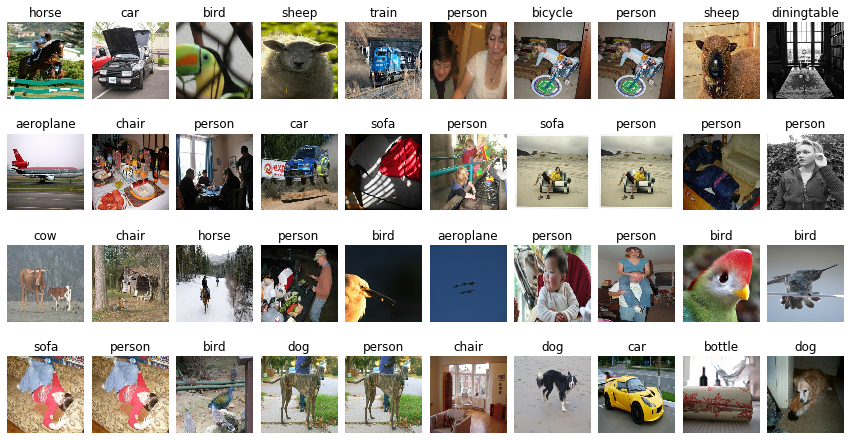

In [0]:
fig, ax = plt.subplots(4,10,figsize=(15,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,4):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10,:,:,:])
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
# Classification Model

## [TASK] Create your own model
<font color='red' size=5><pre>Buatlah model klasifikasimu sendiri!!</pre></font>


Misalnya:
* load pretrain
* define new layers
* define trainable layers
* have fun

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

np.set_printoptions(precision=7)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

In [0]:
#Menggunakan VGG16


model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

x = model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

myModel_imagenet = Model(inputs=model.input, outputs=predictions, name='VGG ImageNet')
myModel_imagenet.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


58892288/58889256 [==============================] - 2s 0us/step
Model: "VGG ImageNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

## [TASK] Compile Model
<font color='red' size=5><pre>Compile modelmu dengan loss dan metrik pilihanmu!</pre></font>



In [0]:
opt = tf.keras.optimizers.Adam(lr=0.000001, decay=1e-6)

In [0]:
# myModel.compile()

myModel_imagenet.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

---
# Data Preparation

## [TASK] Normalize Data

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Normalisasikan data jika diperlukan!</pre></font>


have fun

## [TASK] Additional Scheme

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Tambahkan skema dan implementasi yang ingin kalian lakukan</pre></font>


Misalnya:
* Data Augmentation
* Custom training function
* Checkpoint
* Learning Rate Annealing
* have fun

---
# Train and Testing




## [TASK] Train the Model
<font color='red' size=5><pre>Latih modelmu! <br>Definisikanlah batch size dan epoch!!<br>Gunakan data validasi</pre></font>

In [0]:
# batch_size=100
# epochs = 20

In [0]:
# history = myModel_imagenet.fit(X_train, y_train_hot,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_data=(X_val, y_val_hot),
#                     shuffle=True)

In [0]:
"""
Tambahan
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
myModel_imagenet.fit(X_train,y_train_hot)

Train on 2825 samples
2825/2825 [==============================] - 28s 10ms/sample - loss: 5.2453 - acc: 0.0379


In [0]:
opt = tf.keras.optimizers.Adam(lr=0.000001, decay=1e-6)

In [0]:
batch_size=100
epochs = 20

In [0]:
myModel_imagenet.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

In [0]:
history = myModel_imagenet.fit(X_train, y_train_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val_hot),
                    shuffle=True)

Train on 2825 samples, validate on 2888 samples
Epoch 1/20
2825/2825 [==============================] - 35s 12ms/sample - loss: 3.1530 - acc: 0.1214 - val_loss: 2.9713 - val_acc: 0.1742
Epoch 2/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.8008 - acc: 0.2184 - val_loss: 2.7747 - val_acc: 0.2327
Epoch 3/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.6410 - acc: 0.2616 - val_loss: 2.6644 - val_acc: 0.2639
Epoch 4/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.5310 - acc: 0.2881 - val_loss: 2.5841 - val_acc: 0.2756
Epoch 5/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.4405 - acc: 0.3112 - val_loss: 2.5197 - val_acc: 0.2909
Epoch 6/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.3613 - acc: 0.3281 - val_loss: 2.4653 - val_acc: 0.3099
Epoch 7/20
2825/2825 [==============================] - 27s 10ms/sample - loss: 2.2884 - acc: 0.3487 - val_loss: 2.4152 - va

## Plot History Training

In [0]:
# plt.rcParams['figure.figsize'] = [7, 5]

# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='val')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


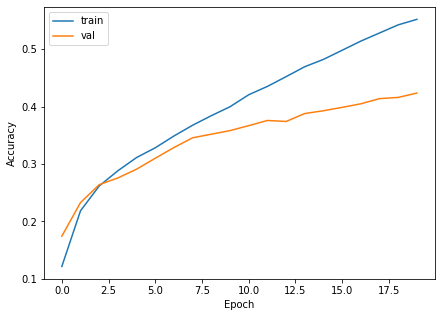

In [0]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## [TASK] Evaluasi Model
<font color='red' size=5><pre>Evaluasikan modelmu pada data test</pre></font>


In [0]:
scores = myModel_imagenet.evaluate(X_test, y_test_hot, verbose=1)

2000/2000 [==============================] - 5s 3ms/sample - loss: 1.9948 - acc: 0.4185


In [0]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 1.9948355388641357
Test accuracy: 41.85%


---
# Save Model


## [TASK] Save model into .h5 file

<font color='red' size=5><pre>Simpan model terbaikmu dengan nama file 'model_kelompok.h5'</pre></font>

* misal kelompok kalian adalah kelompok `3_2`,
* maka nama file model haruslah `model_3_2.h5`

In [0]:
from keras.models import load_model


Using TensorFlow backend.


In [0]:
myModel_imagenet.save('model_3_6.h5')

## [TASK] Download model


<font color='red' size=5><pre>Download modelmu dari tab `Files`</pre></font>

## [TASK] Upload model


<font color='red' size=5><pre>Upload modelmu ke suatu storage cloud,<br>Kumpulkan link di google sheet daftar kelompok</pre></font>

## [TASK] Share File Colab


<font color='red' size=5><pre>Share dan Set file colaboratory ini agar bisa dilihat oleh orang lain<br>
Copy link file colaboratory
Lalu kumpulkan link di google sheet daftar kelompok</pre></font>

---
# Menguji Pada Image Dari Internet

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>tambahkan 5 gambar baru, dan coba modelmu terhadap gambar tersebut</pre></font>

* Search Gambar di Internet (Google Image)
* Copy Image Address
* Paste Image Address ke cell di bawah

In [0]:
!wget -O 'data_test_0.jpg' 'https://bd.gaadicdn.com/processedimages/hero-motocorp/hero-motocorp-splendor/640X309/v_hero-motocorp-splendor-plus-alloy1527921365.jpg'
!wget -O 'data_test_1.jpg' 'https://jaynejubb.com/wp-content/uploads/2018/07/CrowdedCity-e1532260936283.jpg'
!wget -O 'data_test_2.jpg' 'https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/10/22/13/aeroplane-flying.jpg'
!wget -O 'data_test_3.jpg' 'https://www.midlandsderm.com/wp-content/uploads/2019/04/Rachel-R.-Person-760x760.jpg'
!wget -O 'data_test_4.jpg' 'https://res.cloudinary.com/twenty20/private_images/t_standard-fit/v1535005695/photosp/1e3b242b-a39e-4acf-a548-7fc439becaaa/1e3b242b-a39e-4acf-a548-7fc439becaaa.jpg'

--2019-12-25 19:47:42--  https://bd.gaadicdn.com/processedimages/hero-motocorp/hero-motocorp-splendor/640X309/v_hero-motocorp-splendor-plus-alloy1527921365.jpg
Resolving bd.gaadicdn.com (bd.gaadicdn.com)... 99.84.74.111, 99.84.74.81, 99.84.74.40, ...
Connecting to bd.gaadicdn.com (bd.gaadicdn.com)|99.84.74.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34437 (34K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]  33.63K   149KB/s    in 0.2s    

2019-12-25 19:47:43 (149 KB/s) - ‘data_test_0.jpg’ saved [34437/34437]

--2019-12-25 19:47:45--  https://jaynejubb.com/wp-content/uploads/2018/07/CrowdedCity-e1532260936283.jpg
Resolving jaynejubb.com (jaynejubb.com)... 192.185.169.44
Connecting to jaynejubb.com (jaynejubb.com)|192.185.169.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42286 (41K) [image/jpeg]
Saving to: ‘data_test_1.jpg’

data_test_1.jpg     100%[===================>]  41.29K 

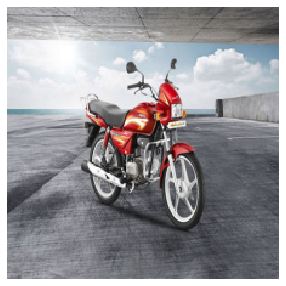

id kelas prediksi 14
kelas prediksi person


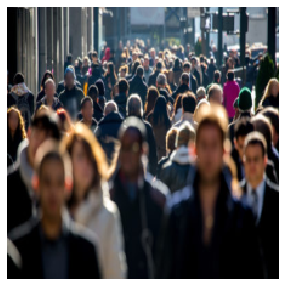

id kelas prediksi 14
kelas prediksi person


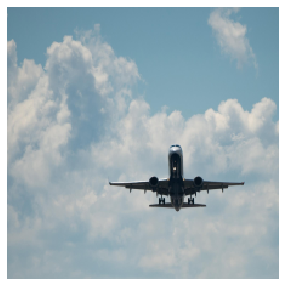

id kelas prediksi 3
kelas prediksi boat


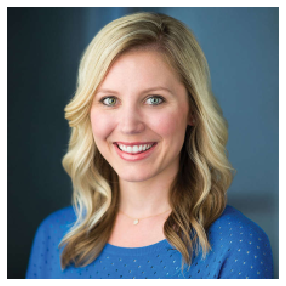

id kelas prediksi 14
kelas prediksi person


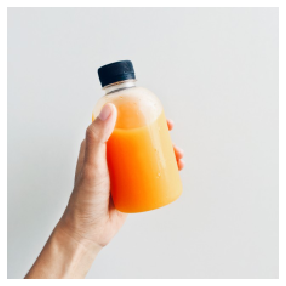

id kelas prediksi 0
kelas prediksi aeroplane


In [0]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0)
  pred = myModel_imagenet.predict(new_img2)
  class_id = np.argmax(pred)
  print('id kelas prediksi',class_id)
  print('kelas prediksi', class_names[class_id])

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>